# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
%whos

Interactive namespace is empty.


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [5]:
yf.pdr_override()

In [6]:
import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [7]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [8]:
google = pdr.get_data_yahoo("GOOGL",
                            start = dt.datetime(2011,8,1),
                            end = dt.datetime(2020,7,1))

[*********************100%%**********************]  1 of 1 completed


In [10]:
goog_df = google[["Adj Close"]]
goog_df = goog_df.rename(columns = {"Adj Close":"price"})
goog_df

,price
Date,
2011-08-01,15.184434
2011-08-02,14.824825
2011-08-03,15.044294
2011-08-04,14.452452
2011-08-05,14.490490
...,...
2020-06-24,71.635002
2020-06-25,72.055000
2020-06-26,68.126999


In [11]:
# goog_df["distance"] = goog_df["price"] - goog_df["SMA_42"]

In [12]:
def deviation_function(df):
    df["SMA_42"] = df["price"].rolling(window = 42).mean()
    df["distance"] = df["price"].rolling(window = 42).std()
    df["+std_2"] = df["SMA_42"] + 2 * df["distance"]
    df["-std_2"] = df["SMA_42"] - 2 * df["distance"]
    return df

In [13]:
deviation_function(goog_df)

,price,SMA_42,distance,+std_2,-std_2
Date,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN
2011-08-03,15.044294,NaN,NaN,NaN,NaN
2011-08-04,14.452452,NaN,NaN,NaN,NaN
2011-08-05,14.490490,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-24,71.635002,69.876214,2.591563,75.059340,64.693089
2020-06-25,72.055000,70.078881,2.410731,74.900342,65.257420
2020-06-26,68.126999,70.233583,2.034394,74.302372,66.164795


<Axes: xlabel='Date'>

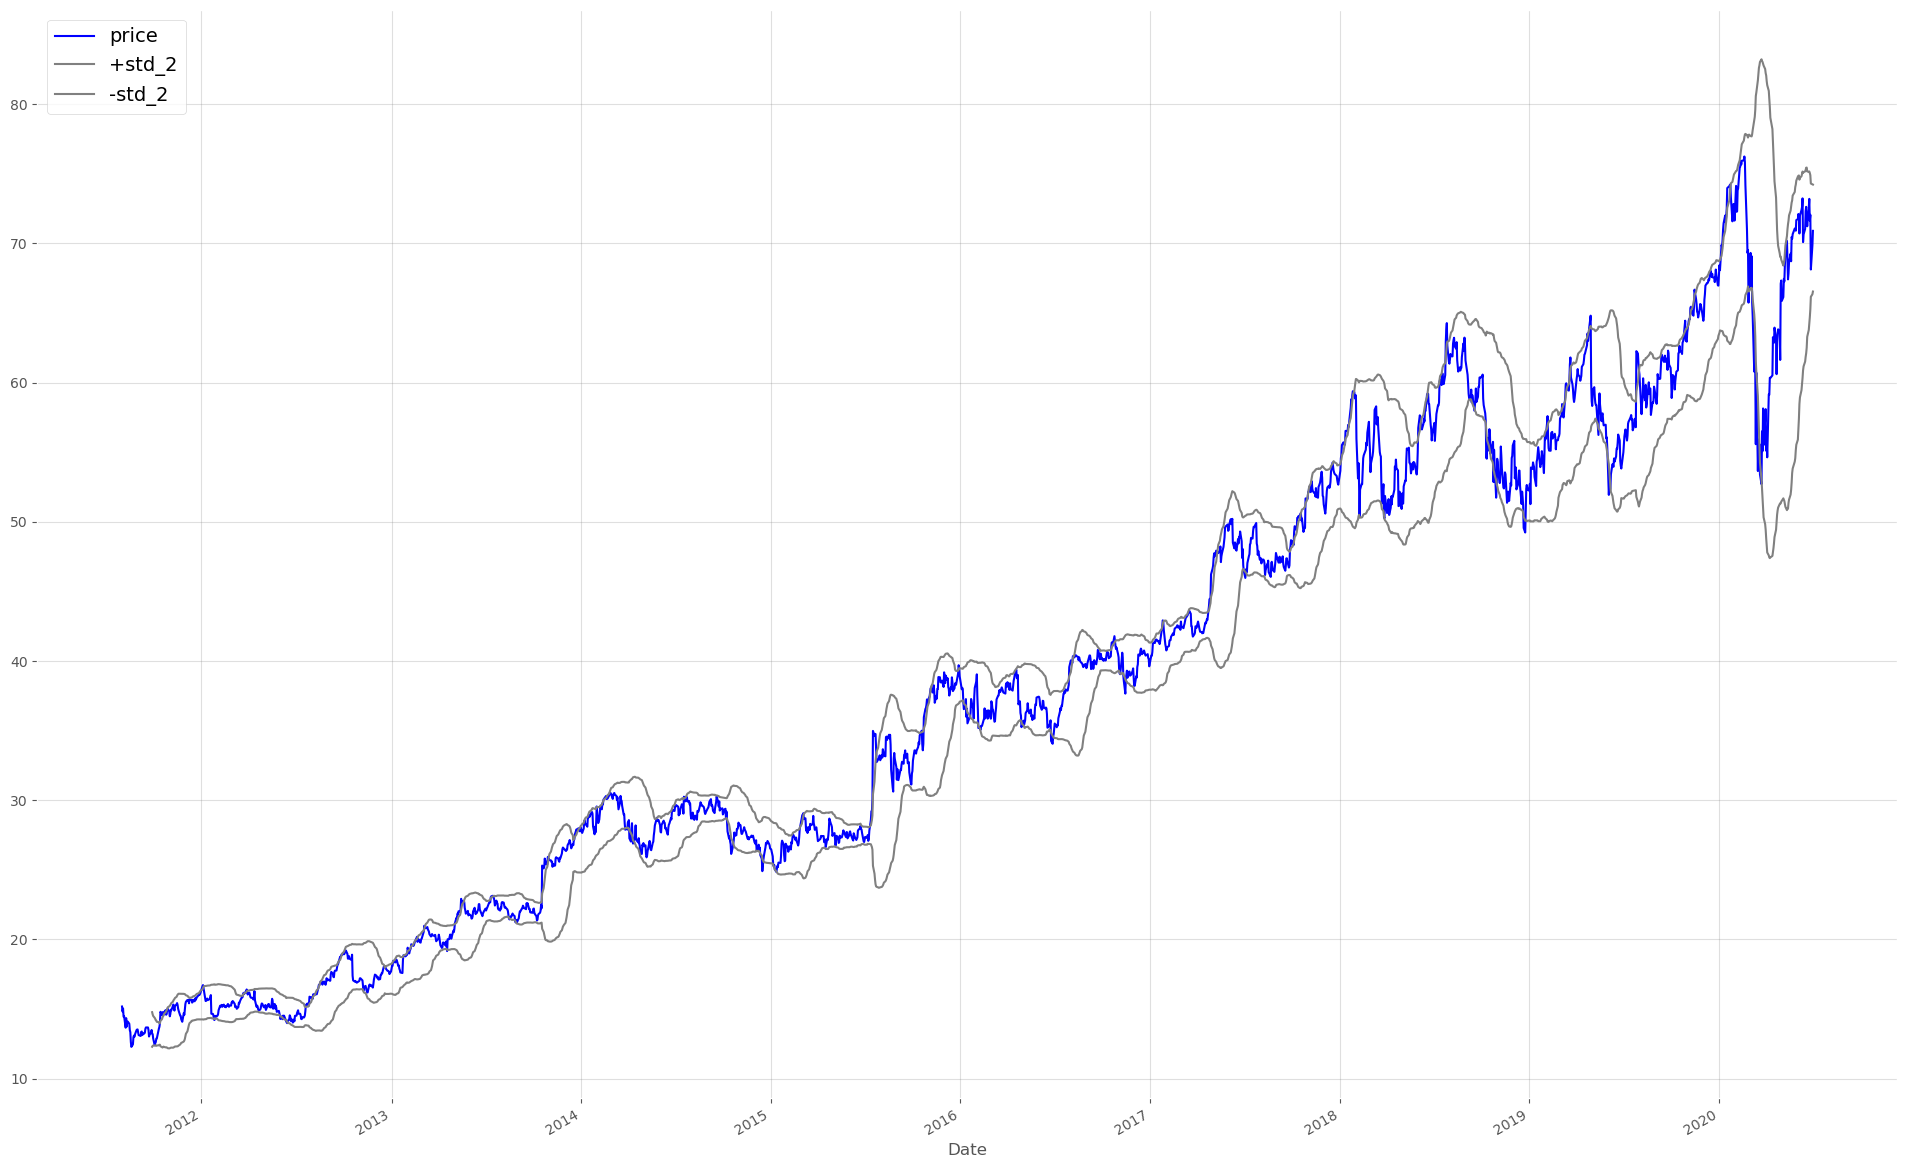

In [14]:
goog_df[["price","+std_2","-std_2"]].plot(figsize = (24,16),color = ["blue","grey","grey"])

In [15]:
def signal_func(df):
#     df[["price","+std_2","-std_2"]].plot(figsize = (16,10),
#                                          color = ["blue","grey","grey"])
    fig = plt.figure(figsize = (24,16))
    sub = fig.add_subplot(111,ylabel = "stock price")
    df["price"].plot(ax = sub,color = "blue")
    df[["+std_2","-std_2"]].plot(ax = sub,style = ["--","--"],color = ["grey","grey"],lw = 0.8)
    
    position_df = np.where(df["price"] > df["+std_2"],-1,np.nan)
    sub.plot(df.loc[position_df == -1].index,df["price"][position_df == -1],
             "v",color = "red",markersize = 8)
    position_df = np.where(df["price"] < df["-std_2"],1,np.nan)
    sub.plot(df.loc[position_df == 1].index,df["price"][position_df == 1],
             "^",color = "green",markersize = 8)
    
    plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

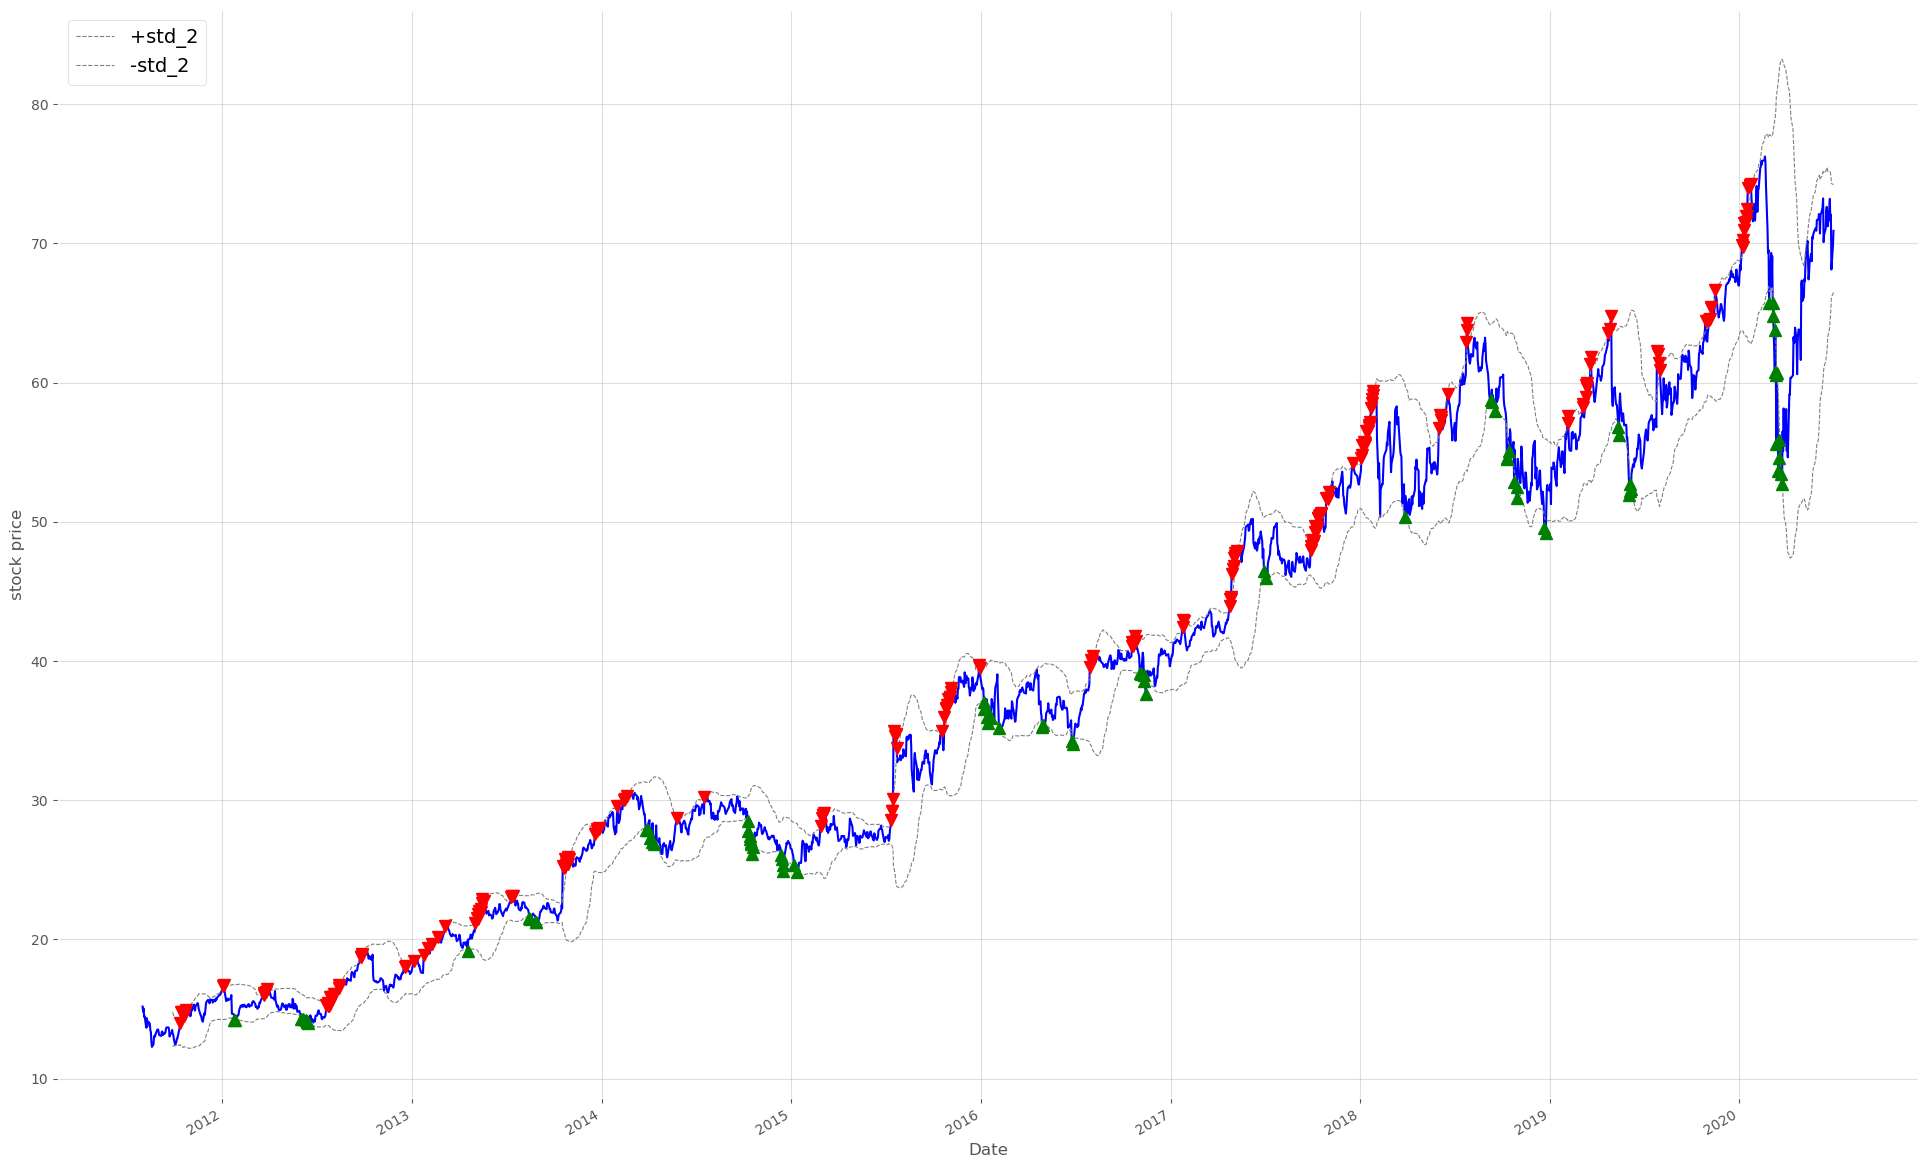

In [16]:
signal_func(goog_df)

##### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [17]:
apple = pdr.get_data_yahoo("AAPL",
                          start = dt.datetime(2011,8,1),
                          end = dt.datetime(2020,7,1))
amazon = pdr.get_data_yahoo("AMZN",
                          start = dt.datetime(2011,8,1),
                          end = dt.datetime(2020,7,1))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
aapl_df = apple[["Adj Close"]]
aapl_df = aapl_df.rename(columns = {"Adj Close":"price"})
amzn_df = amazon[["Adj Close"]]
amzn_df = amzn_df.rename(columns = {"Adj Close":"price"})

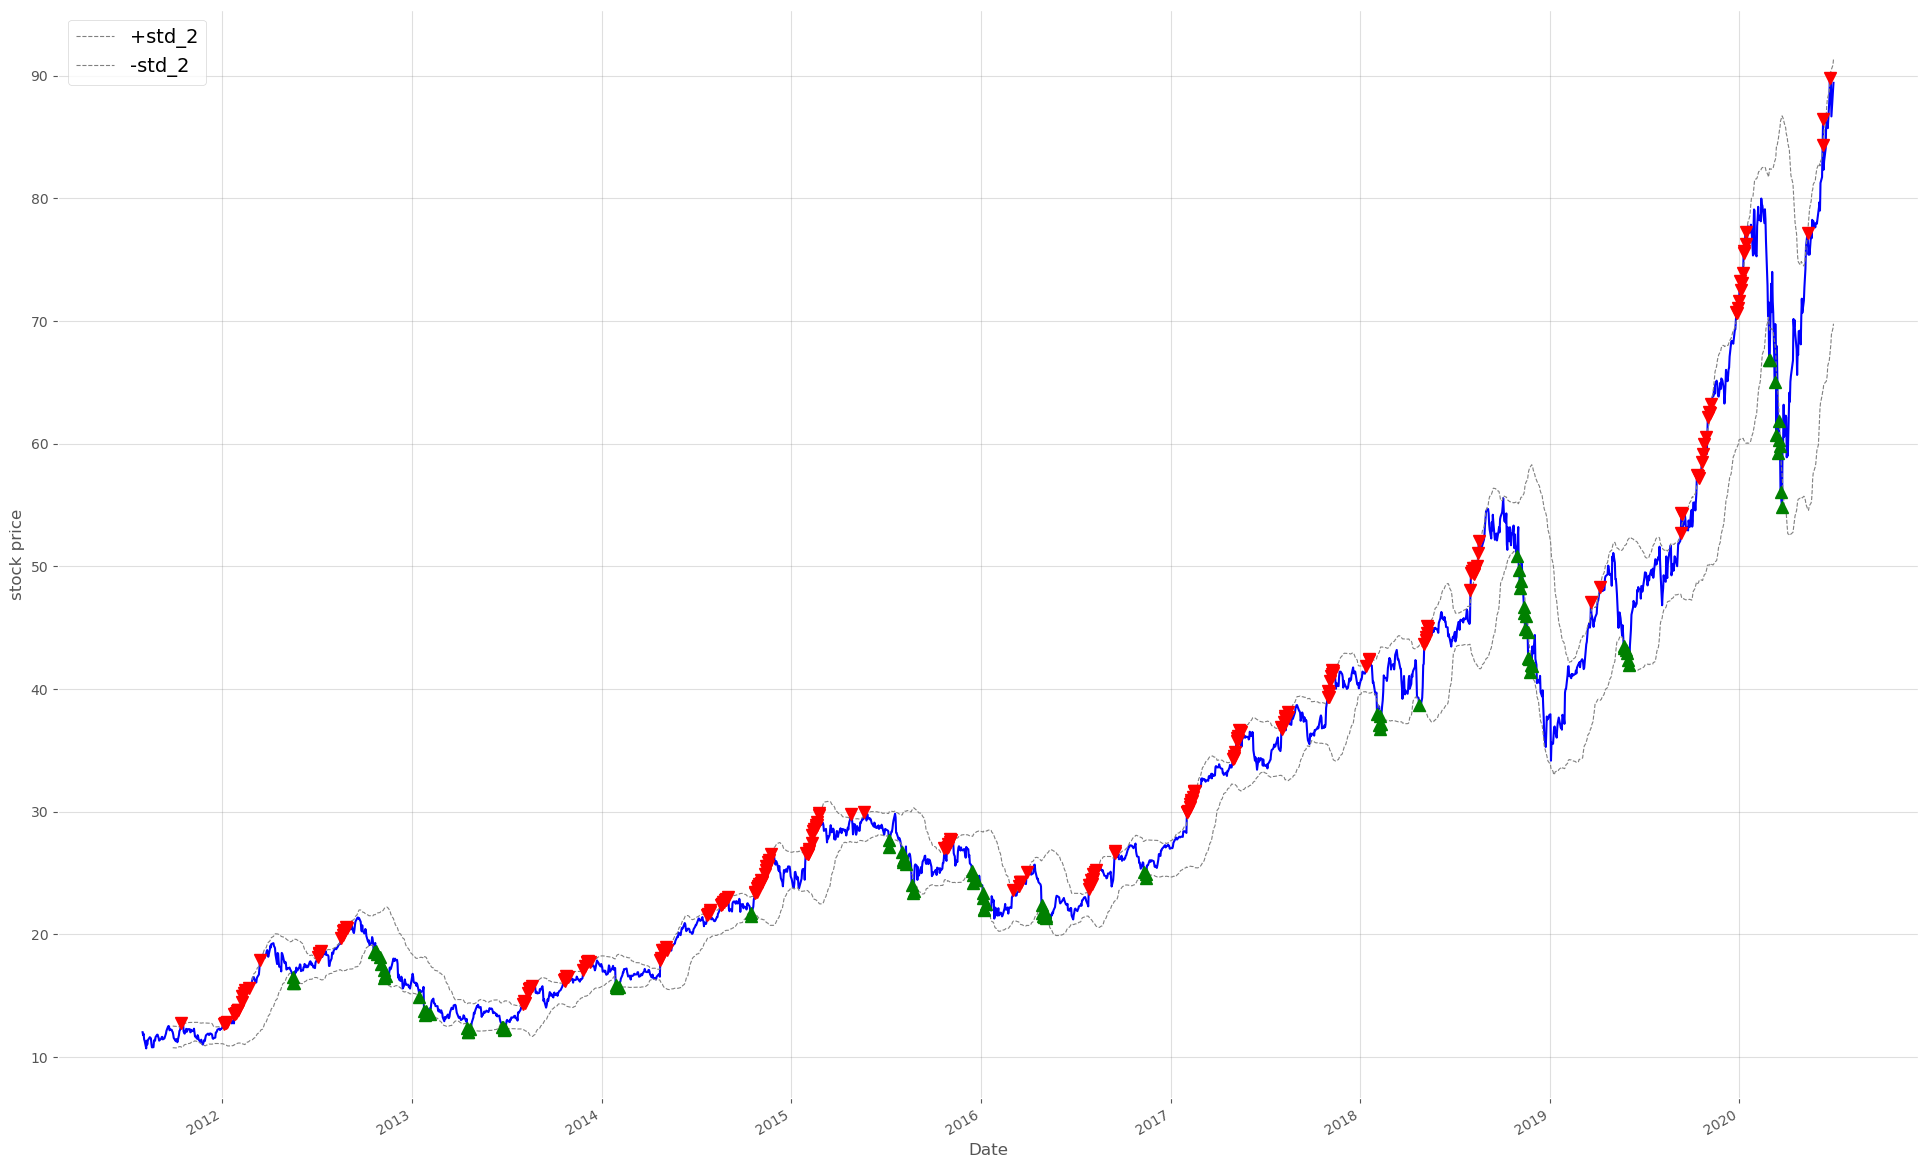

In [19]:
aapl_df = deviation_function(aapl_df)
signal_func(aapl_df)

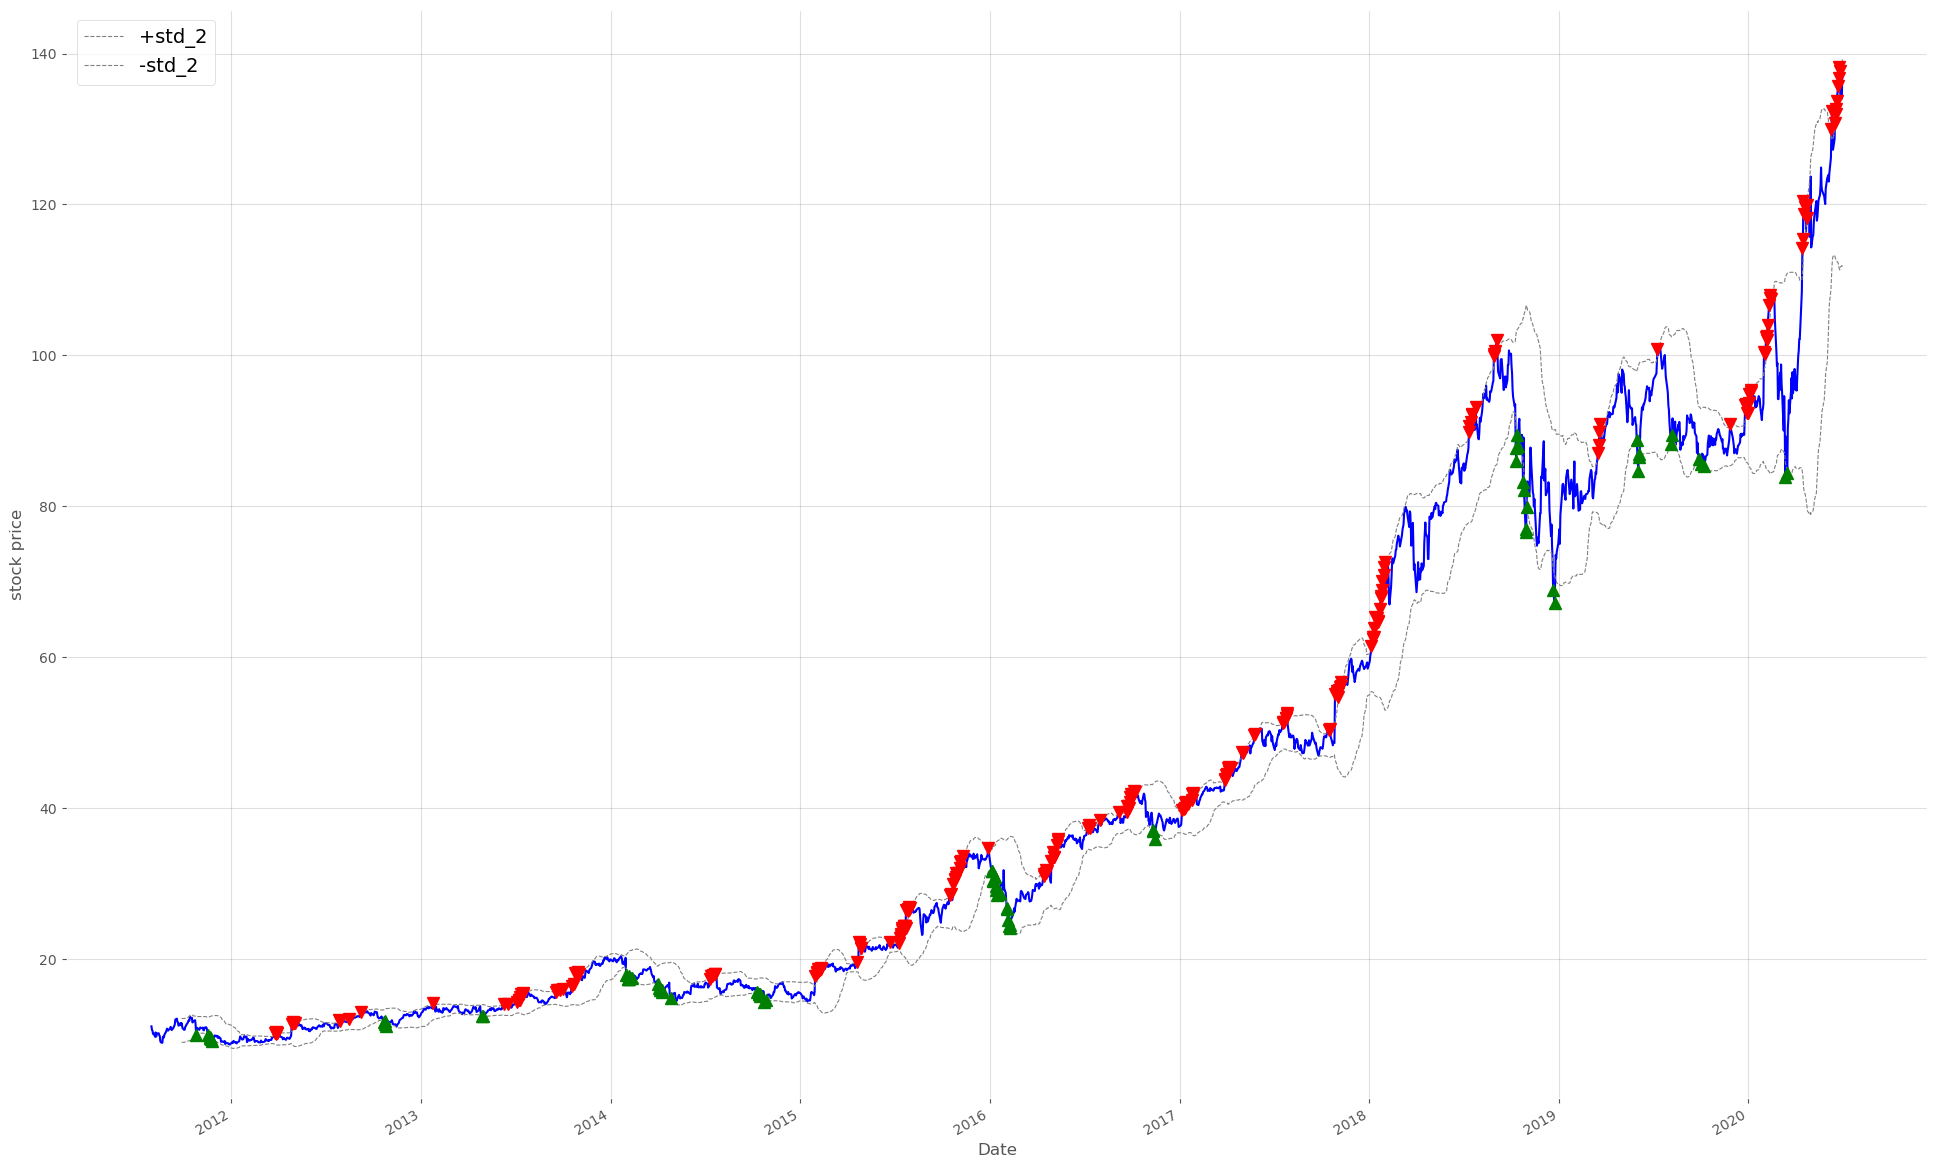

In [20]:
amzn_df = deviation_function(amzn_df)
signal_func(amzn_df)

In [21]:
# def threshold_function(threshold,df):
#     df["position"] = np.where(df["distance"] > threshold,-1,np.nan)
#     df["position"] = np.where(df["distance"] < -threshold,1,df["position"])
#     df["position"] = np.where(df["distance"] * df["distance"].shift(1) < 0,
#                                 0,df["position"])

#     df["distance"].plot(figsize = (18,10),color = "grey")
#     plt.scatter(df[df["position"] == 1].index,df[df["position"] == 1]["position"],color = "green")
#     plt.scatter(df[df["position"] == -1].index,df[df["position"] == -1]["position"],color = "red")
#     plt.scatter(df[df["position"] == 0].index,df[df["position"] == 0]["position"],color = "blue")
#     return plt.show()

In [22]:
amzn_df.head(40)

,price,SMA_42,distance,+std_2,-std_2
Date,,,,,
2011-08-01,11.0660,NaN,NaN,NaN,NaN
2011-08-02,10.5850,NaN,NaN,NaN,NaN
2011-08-03,10.4980,NaN,NaN,NaN,NaN
2011-08-04,10.0740,NaN,NaN,NaN,NaN
2011-08-05,10.1350,NaN,NaN,NaN,NaN
2011-08-08,9.6850,NaN,NaN,NaN,NaN
2011-08-09,10.2545,NaN,NaN,NaN,NaN
2011-08-10,9.7065,NaN,NaN,NaN,NaN
2011-08-11,9.9180,NaN,NaN,NaN,NaN


In [23]:
def position_function(df):
    df["position"] = np.where(df["price"] > df["+std_2"],-1.0,np.nan)
    df["position"] = np.where(df["price"] < df["-std_2"],1.0,df["position"])
    
    df["position"] = np.where((df["price"] - df["SMA_42"]) * (df["price"].shift(1) - df["SMA_42"].shift(1)) < 0,0,df["position"])

    df["position"] = df["position"].ffill()
    return df

In [24]:
position_function(goog_df)
position_function(aapl_df)
position_function(amzn_df)

,price,SMA_42,distance,+std_2,-std_2,position
Date,,,,,,
2011-08-01,11.066000,NaN,NaN,NaN,NaN,NaN
2011-08-02,10.585000,NaN,NaN,NaN,NaN,NaN
2011-08-03,10.498000,NaN,NaN,NaN,NaN,NaN
2011-08-04,10.074000,NaN,NaN,NaN,NaN,NaN
2011-08-05,10.135000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,136.720001,123.847405,6.175184,136.197773,111.497038,-1.0
2020-06-25,137.729004,124.298096,6.481004,137.260105,111.336087,-1.0
2020-06-26,134.643494,124.749036,6.527182,137.803400,111.694672,-1.0


In [25]:
def sharpe_ratio_function(df):
    df["returns"] = np.log(df["price"] / df["price"].shift(1))
    df["strategy_returns"] = df["returns"] * df["position"].shift(1)
    daily_average_return = df["strategy_returns"].mean()
    daily_average_std = df["strategy_returns"].std()
    sharpe_ratio = np.sqrt(253) * (daily_average_return / daily_average_std)
    return sharpe_ratio

In [26]:
sharpe_ratio_function(aapl_df)

-0.3463107272163252

In [27]:
sharpe_ratio_function(amzn_df)

-0.2195296379953211

In [28]:
sharpe_ratio_function(goog_df)

0.08049382488992746

### <font color = red> Answer 2 </font>

    The answer is __Amazson__________ .

In [50]:
aapl_df

,price,SMA_42,distance,+std_2,-std_2,position,returns,strategy_returns
Date,,,,,,,,
2011-08-01,12.027145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-02,11.789479,NaN,NaN,NaN,NaN,NaN,-0.019959,NaN
2011-08-03,11.900431,NaN,NaN,NaN,NaN,NaN,0.009367,NaN
2011-08-04,11.439657,NaN,NaN,NaN,NaN,NaN,-0.039489,NaN
2011-08-05,11.325975,NaN,NaN,NaN,NaN,NaN,-0.009987,NaN
...,...,...,...,...,...,...,...,...
2020-06-24,88.257698,78.780138,5.547507,89.875152,67.685125,-1.0,-0.017810,0.017810
2020-06-25,89.429359,79.261240,5.574584,90.410408,68.112072,-1.0,0.013188,-0.013188
2020-06-26,86.681580,79.703634,5.401912,90.507458,68.899810,-1.0,-0.031208,0.031208


### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [51]:
goog_df

,price,SMA_42,distance,+std_2,-std_2,position,returns,strategy_returns
Date,,,,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN,NaN,-0.023968,NaN
2011-08-03,15.044294,NaN,NaN,NaN,NaN,NaN,0.014696,NaN
2011-08-04,14.452452,NaN,NaN,NaN,NaN,NaN,-0.040135,NaN
2011-08-05,14.490490,NaN,NaN,NaN,NaN,NaN,0.002629,NaN
...,...,...,...,...,...,...,...,...
2020-06-24,71.635002,69.876214,2.591563,75.059340,64.693089,0.0,-0.021598,-0.0
2020-06-25,72.055000,70.078881,2.410731,74.900342,65.257420,0.0,0.005846,0.0
2020-06-26,68.126999,70.233583,2.034394,74.302372,66.164795,0.0,-0.056056,-0.0


In [29]:
capital = 200000

In [53]:
# position = pd.DataFrame(index = goog_df.index)
# position["goog"] = goog_df["position"] * 100
# portfolio = position.multiply(goog_df["price"],axis = 0)
# difference_in_shares_hold = position.diff()
# portfolio["our_holdings"] = position.multiply(goog_df["price"],axis = 0).sum(axis = 1)
# portfolio["our_cash"] = capital - (difference_in_shares_hold.multiply(goog_df["price"],axis = 0).sum(axis = 1).cumsum())
# portfolio["total"] = portfolio["our_holdings"] + portfolio["our_cash"]
# portfolio

In [30]:
def security_return_function(df,trade_size,name):
    position = pd.DataFrame(index = df.index)
    position[name] = df["position"] * trade_size
    portfolio = position.multiply(df["price"],axis = 0)
    difference_in_shares_hold = position.diff()
    portfolio["our_holdings"] = position.multiply(df["price"],axis = 0).sum(axis = 1)
    portfolio["our_cash"] = capital - (difference_in_shares_hold.multiply(df["price"],axis = 0).sum(axis = 1).cumsum())
    portfolio["total"] = portfolio["our_holdings"] + portfolio["our_cash"]
    return portfolio

In [31]:
security_goog = security_return_function(goog_df,100,"goog")
security_goog["total"].iloc[-1]

200182.33404159546

In [32]:
security_aapl = security_return_function(aapl_df,100,"aapl")
security_aapl["total"].iloc[-1]

196611.0149383545

In [33]:
security_amzn = security_return_function(amzn_df,100,"aapl")
security_amzn["total"].iloc[-1]

197617.1504020691

In [34]:
# def strategy_function(df):
#     df["position"] = df["position"].ffill()
#     df["strategy"] = df["returns"] * (df["position"] * 2000)
#     df["cum_returns"] = df["strategy"].cumsum()
#     df["real_return"] = df["cum_returns"]
#     return df

### <font color = red> Answer 3 </font>

    GOOGL : __200182.3340______ 
    
    AAPL  : __196611.0168______ 
     
    AMZN  : __197617.1504______ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [35]:
def compound_annual_growth_rate_function(df,size):

    position = pd.DataFrame(index = df.index)
    position["security"] = df["position"] * size
    portfolio = position.multiply(df["price"],axis = 0)
    difference_in_shares_hold = position.diff()
    portfolio["our_holdings"] = position.multiply(df["price"],axis = 0).sum(axis = 1)
    portfolio["our_cash"] = capital - (difference_in_shares_hold.multiply(df["price"],axis = 0).sum(axis = 1).cumsum())
    portfolio["total"] = portfolio["our_holdings"] + portfolio["our_cash"]
    
    end_value = portfolio["total"].iloc[-1]
    start_value = portfolio["total"].iloc[0]
    days = (portfolio.index[-1] - portfolio.index[0]).days
    CAGR = (end_value / start_value) ** (365 / days) - 1
    return CAGR


In [36]:
compound_annual_growth_rate_function(goog_df,100) *100

0.010215756248288521

In [37]:
compound_annual_growth_rate_function(aapl_df,100)*100

-0.19139825294884893

In [38]:
compound_annual_growth_rate_function(amzn_df,100)*100

-0.13427138103649927

### <font color = red> Answer 4 </font>

    GOOGL : ____0.0102%________ 
    
    AAPL  : ___-0.1914%________ 
     
    AMZN  : ___-0.1343%________ 

## 👇 Questions 5 and 7 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [75]:
from sklearn import linear_model

In [66]:
ge = pdr.get_data_yahoo("GE",start = dt.datetime(2011,8,1),
                        end = dt.datetime(2020,7,1))

[*********************100%%**********************]  1 of 1 completed


In [72]:
# ge = ge[["Adj Close"]]
# ge = ge.rename(columns = {"Adj Close":"price"})
ge

,price
Date,
2011-08-01,82.657272
2011-08-02,79.161507
2011-08-03,80.357399
2011-08-04,75.757683
2011-08-05,75.941650
...,...
2020-06-24,40.246586
2020-06-25,41.171082
2020-06-26,39.998295


In [76]:
def first_predict_tmr_log_returns_func(df,lags):
    df["log_returns"] = np.log(df["price"] / df["price"].shift(1)).fillna(0)
    cols = []
    for i in range(1,lags+1):
        col = f"lag_{i}"
        df[col] = df["log_returns"].shift(i).fillna(0)
        cols.append(col)
    model = linear_model.LinearRegression(fit_intercept = False)
    model.fit(df[cols],df["log_returns"])
    df["first_pred_tmr_return"] = model.predict(df[cols])
    return df

In [77]:
first_predict_tmr_log_returns_func(ge,2)

,price,log_returns,lag_1,lag_2,first_pred_tmr_return
Date,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.000000,0.000000
2011-08-02,79.161507,-0.043213,0.000000,0.000000,0.000000
2011-08-03,80.357399,0.014994,-0.043213,0.000000,0.001694
2011-08-04,75.757683,-0.058944,0.014994,-0.043213,-0.003218
2011-08-05,75.941650,0.002425,-0.058944,0.014994,0.003223
...,...,...,...,...,...
2020-06-24,40.246586,-0.069503,-0.005698,-0.015504,-0.000720
2020-06-25,41.171082,0.022711,-0.069503,-0.005698,0.002377
2020-06-26,39.998295,-0.028899,0.022711,-0.069503,-0.005120


In [80]:
first_predict_tmr_log_returns_func(ge,2)

,price,log_returns,lag_1,lag_2,first_pred_tmr_return
Date,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.000000,0.000000
2011-08-02,79.161507,-0.043213,0.000000,0.000000,0.000000
2011-08-03,80.357399,0.014994,-0.043213,0.000000,0.001694
2011-08-04,75.757683,-0.058944,0.014994,-0.043213,-0.003218
2011-08-05,75.941650,0.002425,-0.058944,0.014994,0.003223
...,...,...,...,...,...
2020-06-24,40.246586,-0.069503,-0.005698,-0.015504,-0.000720
2020-06-25,41.171082,0.022711,-0.069503,-0.005698,0.002377
2020-06-26,39.998295,-0.028899,0.022711,-0.069503,-0.005120


In [79]:
def random_predict_tmr_log_returns_func(df,lag_time):
    df[f"lag_{lag_time}"] = df["log_returns"].shift(lag_time).fillna(0)
    
    model = linear_model.LinearRegression(fit_intercept = False)
    model.fit(df[f"lag_{lag_time}"].values.reshape(-1,1),df["log_returns"].values)
    df[f"pred_tmr_return_{lag_time}"] = model.predict(df[f"lag_{lag_time}"].values.reshape(-1,1))
    return df

In [81]:
random_predict_tmr_log_returns_func(ge,10)


,price,log_returns,lag_1,lag_2,first_pred_tmr_return,lag_10,pred_tmr_return_10
Date,,,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-02,79.161507,-0.043213,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-03,80.357399,0.014994,-0.043213,0.000000,0.001694,0.000000,0.000000
2011-08-04,75.757683,-0.058944,0.014994,-0.043213,-0.003218,0.000000,0.000000
2011-08-05,75.941650,0.002425,-0.058944,0.014994,0.003223,0.000000,0.000000
...,...,...,...,...,...,...,...
2020-06-24,40.246586,-0.069503,-0.005698,-0.015504,-0.000720,-0.052475,-0.001036
2020-06-25,41.171082,0.022711,-0.069503,-0.005698,0.002377,-0.090722,-0.001790
2020-06-26,39.998295,-0.028899,0.022711,-0.069503,-0.005120,0.042260,0.000834


In [83]:
ge_pred = random_predict_tmr_log_returns_func(ge,22)

In [84]:
ge_pred

,price,log_returns,lag_1,lag_2,first_pred_tmr_return,lag_10,pred_tmr_return_10,lag_22,pred_tmr_return_22
Date,,,,,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-02,79.161507,-0.043213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-03,80.357399,0.014994,-0.043213,0.000000,0.001694,0.000000,0.000000,0.000000,0.000000
2011-08-04,75.757683,-0.058944,0.014994,-0.043213,-0.003218,0.000000,0.000000,0.000000,0.000000
2011-08-05,75.941650,0.002425,-0.058944,0.014994,0.003223,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2020-06-24,40.246586,-0.069503,-0.005698,-0.015504,-0.000720,-0.052475,-0.001036,-0.010861,0.000146
2020-06-25,41.171082,0.022711,-0.069503,-0.005698,0.002377,-0.090722,-0.001790,0.059063,-0.000795
2020-06-26,39.998295,-0.028899,0.022711,-0.069503,-0.005120,0.042260,0.000834,0.069581,-0.000937


In [87]:
def numpy_library_ols_function(df):
    ols_1 = np.linalg.lstsq(df[["log_returns","lag_1","lag_2"]],df["log_returns"])[0]
    ols_2 = np.linalg.lstsq(df["lag_10"].values.reshape(-1,1),df["log_returns"])[0]
    ols_3 = np.linalg.lstsq(df["lag_22"].values.reshape(-1,1),df["log_returns"])[0]
    np_predict_tmr_return = pd.DataFrame(np.dot(df[["log_returns","lag_1","lag_2"]],ols_1),
                                         index = df.index,
                                         columns = ["first_strategy"])
    np_predict_tmr_return["second_strategy"] = np.dot(df["lag_10"].values.reshape(-1,1),ols_2)
    np_predict_tmr_return["third_strategy"] = np.dot(df["lag_22"].values.reshape(-1,1),ols_3)
    return np_predict_tmr_return

In [88]:
numpy_library_ols_function(ge)

,first_strategy,second_strategy,third_strategy
Date,,,
2011-08-01,0.000000,0.000000,0.000000
2011-08-02,-0.043213,0.000000,0.000000
2011-08-03,0.014994,0.000000,0.000000
2011-08-04,-0.058944,0.000000,0.000000
2011-08-05,0.002425,0.000000,0.000000
...,...,...,...
2020-06-24,-0.069503,-0.001036,0.000146
2020-06-25,0.022711,-0.001790,-0.000795
2020-06-26,-0.028899,0.000834,-0.000937


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

<Axes: xlabel='Date'>

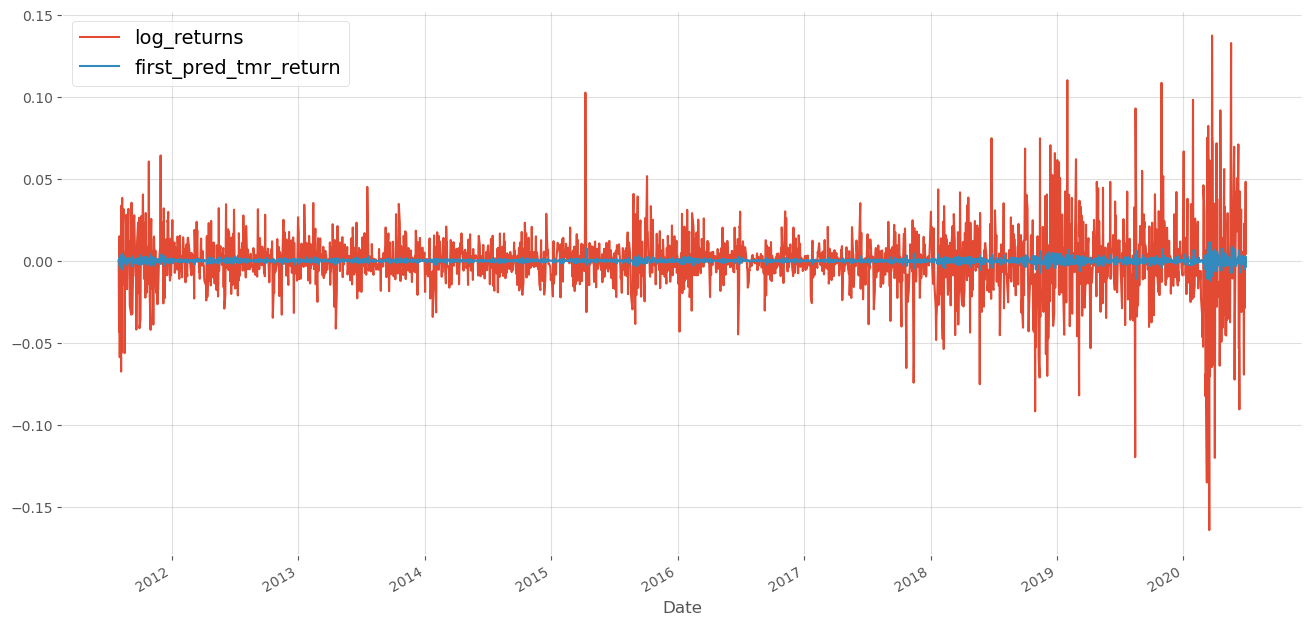

In [89]:
ge_pred[["log_returns","first_pred_tmr_return"]].plot(figsize = (16,8))

<Axes: xlabel='Date'>

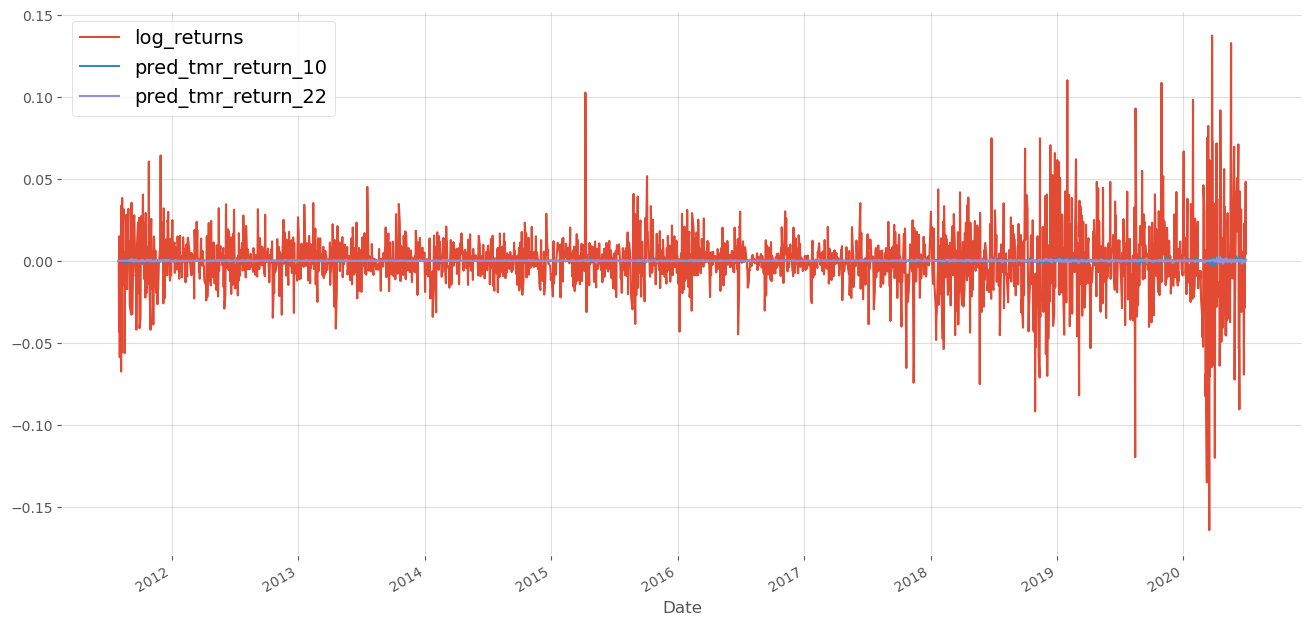

In [91]:
ge_pred[["log_returns","pred_tmr_return_10","pred_tmr_return_22"]].plot(figsize = (16,8))

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In our class, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [113]:
def calculate_accuracy_A(returns, predictions,tolerance):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A,total_predictions

In [114]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    total_predictions = total_correct + total_incorrect
    
    return accuracy_B,total_predictions

In [99]:
ge_pred.head(3)

,price,log_returns,lag_1,lag_2,first_pred_tmr_return,lag_10,pred_tmr_return_10,lag_22,pred_tmr_return_22
Date,,,,,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2011-08-02,79.161507,-0.043213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2011-08-03,80.357399,0.014994,-0.043213,0.0,0.001694,0.0,0.0,0.0,0.0


In [100]:
col_name = {"3_day_lag":"first_pred_tmr_return",
            "10_day_lag":"pred_tmr_return_10",
            "22_day_lag":"pred_tmr_return_22"}

In [101]:
list(col_name.keys())

['3_day_lag', '10_day_lag', '22_day_lag']

In [154]:
def test_accuracy_rate_function(df,col_name_i,name):
    test_accuracy_A = calculate_accuracy_A(df["log_returns"],df[col_name[col_name_i]],0.005)[0]
    total_predictions_A = calculate_accuracy_A(df["log_returns"],df[col_name[col_name_i]],0.005)[1]
    test_accuracy_B = calculate_accuracy_B(df["log_returns"],df[col_name[col_name_i]])[0]
    total_predictions_B = calculate_accuracy_B(df["log_returns"],df[col_name[col_name_i]])[1]
    test_accurate_df = \
        pd.DataFrame([round(test_accuracy_A * 100,2),total_predictions_A * test_accuracy_A,
                      total_predictions_A * (1-test_accuracy_A),
                      round(test_accuracy_B * 100,2),total_predictions_B * test_accuracy_B,
                      total_predictions_B * (1-test_accuracy_B)],
                      index = ["A_correct_rate","A_correct_times","A_wrong_times",
                               "B_correct_rate","B_correct_times","B_wrong_times"],
                      columns = [col_name_i])
    for i in list(col_name.keys())[1:]:
        test_accuracy_A = calculate_accuracy_A(df["log_returns"],df[col_name[i]],0.005)[0]
        total_predictions_A = calculate_accuracy_A(df["log_returns"],df[col_name[i]],0.005)[1]
        test_accuracy_B = calculate_accuracy_B(df["log_returns"],df[col_name[i]])[0]
        total_predictions_B = calculate_accuracy_B(df["log_returns"],df[col_name[i]])[1]
        test_accurate_df[i] = [round(test_accuracy_A * 100,2),total_predictions_A * test_accuracy_A,total_predictions_A * (1-test_accuracy_A),
                               round(test_accuracy_B * 100,2),total_predictions_B * test_accuracy_B,total_predictions_B * (1-test_accuracy_B)]
    return test_accurate_df

In [155]:
calculate_accuracy_A(ge["log_returns"],ge["first_pred_tmr_return"],0.005)[0]


0.3422459893048128

In [156]:
test_accuracy_rate_function(ge,"3_day_lag","ge_prediction")

,3_day_lag,10_day_lag,22_day_lag
A_correct_rate,34.22,34.05,34.00
A_correct_times,768.00,764.00,763.00
A_wrong_times,1476.00,1480.00,1481.00
B_correct_rate,50.00,48.35,48.22
B_correct_times,1122.00,1085.00,1082.00
B_wrong_times,1122.00,1159.00,1162.00


### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 </font>
    The prediction is __768___ times correct and __1476___ wrong. The accuracy is ___34.22___ % with a 3-day lag.
    
    The prediction is __764___ times correct and __1480___ wrong. The accuracy is ___34.05___ % with a 10-day lag.
    
    The prediction is __763___ times correct and __1481___ wrong. The accuracy is ___34.00___ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [159]:
ge.head(3)

,price,log_returns,lag_1,lag_2,first_pred_tmr_return,lag_10,pred_tmr_return_10,lag_22,pred_tmr_return_22
Date,,,,,,,,,
2011-08-01,82.657272,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2011-08-02,79.161507,-0.043213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2011-08-03,80.357399,0.014994,-0.043213,0.0,0.001694,0.0,0.0,0.0,0.0


In [162]:
def sharpe_ratio_function_7(df,lag_day):
    strategy_return = df["log_returns"] * df[col_name[lag_day]].shift(1)
    daily_average_return = strategy_return.mean()
    daily_average_std = strategy_return.std()
    sharpe_ratio = np.sqrt(253) * (daily_average_return / daily_average_std)
    return sharpe_ratio

In [166]:
round(sharpe_ratio_function_7(ge,"3_day_lag") * 100,2)

-17.58

In [167]:
round(sharpe_ratio_function_7(ge,"10_day_lag") * 100,2)

-11.18

In [168]:
round(sharpe_ratio_function_7(ge,"22_day_lag") * 100,2)

33.06

### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of ___-17.58%____ .
    
    The strategy for GE with a 10-day lag leads to a Sharpe ratio of ___-11.18%____ .
        
    The strategy for GE with a 22-day lag leads to a Sharpe ratio of ____33.06%____ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [169]:
start = dt.datetime(2013,11,1)
end = dt.datetime(2021,10,1)

In [200]:
gs_df = pdr.get_data_yahoo("GS",start,end)

[*********************100%%**********************]  1 of 1 completed


In [201]:
jpm_df = pdr.get_data_yahoo("JPM",start,end)

[*********************100%%**********************]  1 of 1 completed


In [179]:
jpm_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [202]:
def prepare_df_function(df):
    df = df[["Adj Close"]]
    df = df.rename(columns = {"Adj Close":"price"})
    df["returns"] = np.log(df["price"] / df["price"].shift(1))
    df["SMA_24"] = df["price"].rolling(window = 24).mean()
    df["SMA_58"] = df["price"].rolling(window = 58).mean()
    df["position"] = np.where(df["SMA_24"] > df["SMA_58"],1,-1)
    df["strategy_return"] = df["returns"] * df["position"].shift(1)
    df["cum_returns"] = \
        df["strategy_return"].cumsum().apply(np.exp)
    df["max_gross_performance"] = df["cum_returns"].cummax()
    return df

def max_drawdown_function(df):
    drawdown = df["max_gross_performance"] - df["cum_returns"]
    max_drawdown = round(drawdown.max()*100,4)
    return max_drawdown

In [205]:
gs_df_1 = prepare_df_function(gs_df)


In [207]:
jpm_df_1 = prepare_df_function(jpm_df)

In [213]:
def drawdown_visualize_function(df):
    plt.figure(figsize = (24,14))
    df[["cum_returns","max_gross_performance"]].plot(color = ["blue","red"])
    plt.show()

In [216]:
def drawdown_period_function(df):
    drawdown = df["max_gross_performance"] - df["cum_returns"]
    drawdown_period = (drawdown[drawdown == 0].index[1: ] - drawdown[drawdown == 0].index[:-1]).days
    longest_drawdown_period = drawdown_period.max()
    return longest_drawdown_period

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

<Figure size 2400x1400 with 0 Axes>

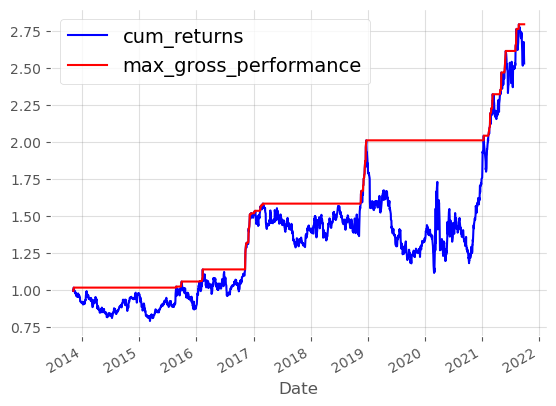

In [214]:
drawdown_visualize_function(gs_df_1)

<Figure size 2400x1400 with 0 Axes>

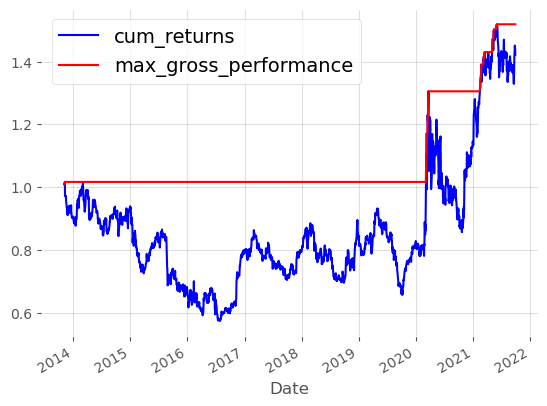

In [215]:
drawdown_visualize_function(jpm_df_1)

In [206]:
max_drawdown_function(gs_df_1)

89.6956

In [217]:
drawdown_period_function(gs_df_1)

752

In [208]:
max_drawdown_function(jpm_df_1)

44.9242

In [218]:
drawdown_period_function(jpm_df_1)

2314

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about ___89.69____ percentage points.
    The longest drawdown period lasts for ____752_____ days.
    
    As to JPM,
    
    The maximum drawdown is about ____44.92_____ percentage points.
    The longest drawdown period lasts for ____2314____ days.
    

In [219]:
gs_df_1.head(3)

,price,returns,SMA_24,SMA_58,position,strategy_return,cum_returns,max_gross_performance
Date,,,,,,,,
2013-11-01,135.119904,NaN,NaN,NaN,-1,NaN,NaN,NaN
2013-11-04,136.045486,0.006827,NaN,NaN,-1,-0.006827,0.993197,0.993197
2013-11-05,135.036545,-0.007444,NaN,NaN,-1,0.007444,1.000617,1.000617


###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [220]:
capital_9 = 300000

In [259]:
def trading_strategy(df,trade_size):
    df = df.dropna()
    position = pd.DataFrame(index = df.index)
    position = df["position"] * trade_size
    portfolio = pd.DataFrame(index = df.index)
    portfolio["security"] = position.multiply(df["price"],axis = 0)
    portfolio["holdings"] = portfolio["security"].apply(np.sum)
    difference_in_shares_owned = position.diff()
    portfolio["our_cash"] = capital_9 - (difference_in_shares_owned
                                             .multiply(df["price"],axis = 0)
                                             .apply(np.sum)
                                             .cumsum())
    portfolio["total"] = portfolio["holdings"] + portfolio["our_cash"]
    return portfolio

In [260]:
trading_strategy(gs_df_1,100)

,security,holdings,our_cash,total
Date,,,,
2014-01-27,13777.210999,13777.210999,NaN,NaN
2014-01-28,13907.711792,13907.711792,300000.000000,313907.711792
2014-01-29,13711.128235,13711.128235,300000.000000,313711.128235
2014-01-30,13873.422241,13873.422241,300000.000000,313873.422241
2014-01-31,13729.525757,13729.525757,300000.000000,313729.525757
...,...,...,...,...
2021-09-24,37018.231201,37018.231201,300419.735718,337437.966919
2021-09-27,37866.851807,37866.851807,300419.735718,338286.587524
2021-09-28,36890.368652,36890.368652,300419.735718,337310.104370


In [261]:
trading_strategy(jpm_df_1,100)

,security,holdings,our_cash,total
Date,,,,
2014-01-27,4225.302124,4225.302124,NaN,NaN
2014-01-28,4275.156021,4275.156021,300000.000000,304275.156021
2014-01-29,4259.049988,4259.049988,300000.000000,304259.049988
2014-01-30,4295.097351,4295.097351,300000.000000,304295.097351
2014-01-31,4246.010208,4246.010208,300000.000000,304246.010208
...,...,...,...,...
2021-09-24,15368.292236,15368.292236,295440.628815,310808.921051
2021-09-27,15739.678955,15739.678955,295440.628815,311180.307770
2021-09-28,15654.846191,15654.846191,295440.628815,311095.475006


### <font color = red> Answer 9 </font>

    The answer is __(1)_GS_IS__310870.19_____
                    AND
                ____(2)_JPM_IS 336223.76_____ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [265]:
jpm_df_1.head(3)

,price,returns,SMA_24,SMA_58,position,strategy_return,cum_returns,max_gross_performance
Date,,,,,,,,
2013-11-01,40.012512,NaN,NaN,NaN,-1,NaN,NaN,NaN
2013-11-04,39.654366,-0.008991,NaN,NaN,-1,0.008991,1.009032,1.009032
2013-11-05,39.585793,-0.001731,NaN,NaN,-1,0.001731,1.010780,1.010780


<Axes: xlabel='Date'>

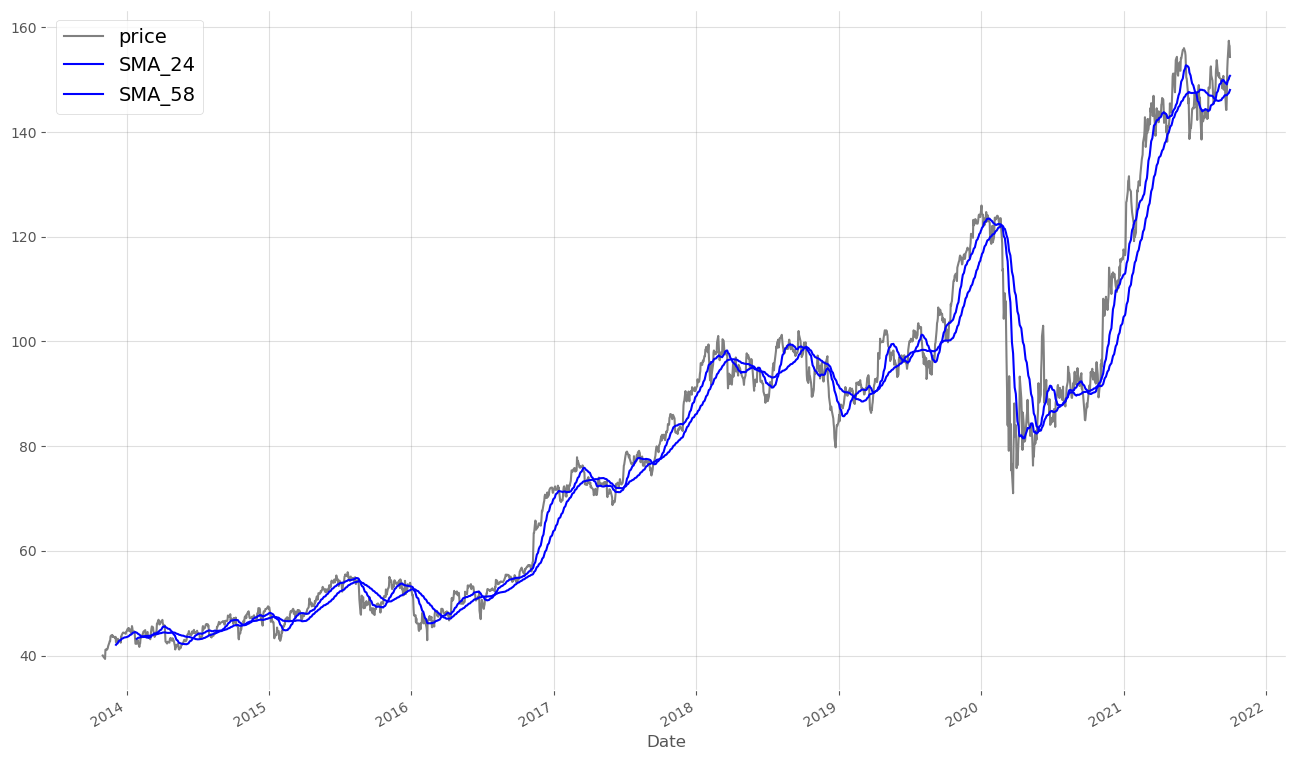

In [268]:
jpm_df_1[["price","SMA_24","SMA_58"]].plot(figsize = (16,10),
                                     color = ["grey", "blue","blue"])

In [278]:
gs_df_1.shape

(1992, 8)

In [296]:
gs_df_1[gs_df_1["SMA_24"] == gs_df_1["SMA_58"]]

,price,returns,SMA_24,SMA_58,position,strategy_return,cum_returns,max_gross_performance
Date,,,,,,,,


In [299]:
gs_df_1["distance"] = gs_df_1["SMA_24"] - gs_df_1["SMA_58"]

,price,returns,SMA_24,SMA_58,position,strategy_return,cum_returns,max_gross_performance,distance
Date,,,,,,,,,


In [309]:
def trading_opportunities_function(df):
    df = df.dropna()
    df["distance"] = df["SMA_24"] -df["SMA_58"]
    opportunities = len(df[df["distance"] * df["distance"].shift(1) < 0])
    buy_opp = len(df[(df["distance"] > 0) & (df["distance"].shift(1) < 0)])
    sell_opp = len(df[(df["distance"] < 0) & (df["distance"].shift(1) > 0)])
    return opportunities,buy_opp,sell_opp

In [310]:
trading_opportunities_function(gs_df_1)

(36, 18, 18)

In [311]:
trading_opportunities_function(jpm_df_1)

(44, 22, 22)

### <font color = red> Answer 10 </font>

    The answer is ____________________________ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊